# Amazon Deliver Dataset Project

In [2]:
# Import the necessary Libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from scipy.stats import randint, uniform


In [3]:
# This library for removing the warnings while running the code

import warnings

warnings.filterwarnings('ignore')

In [8]:
# import dataset (Training)

df = pd.read_csv(r'amazon_delivery.csv')

df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


# EDA

In [11]:
# checking for the  how many columns and row's dataset has
df.shape

(43739, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [15]:
# describe the dataset
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [17]:
df.count()

Order_ID           43739
Agent_Age          43739
Agent_Rating       43685
Store_Latitude     43739
Store_Longitude    43739
Drop_Latitude      43739
Drop_Longitude     43739
Order_Date         43739
Order_Time         43739
Pickup_Time        43739
Weather            43648
Traffic            43739
Vehicle            43739
Area               43739
Delivery_Time      43739
Category           43739
dtype: int64

In [19]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [21]:
# checking the columns which contain the null value 
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [23]:
# just finding a meadian for our reference 
df['Agent_Rating'].median()

4.7

In [25]:
# filling with the median or Average of that respective columns means

df['Agent_Rating'].fillna(df['Agent_Rating'].median(),inplace=True)
print(df['Agent_Rating'].isnull().sum())

0


# Visualizing

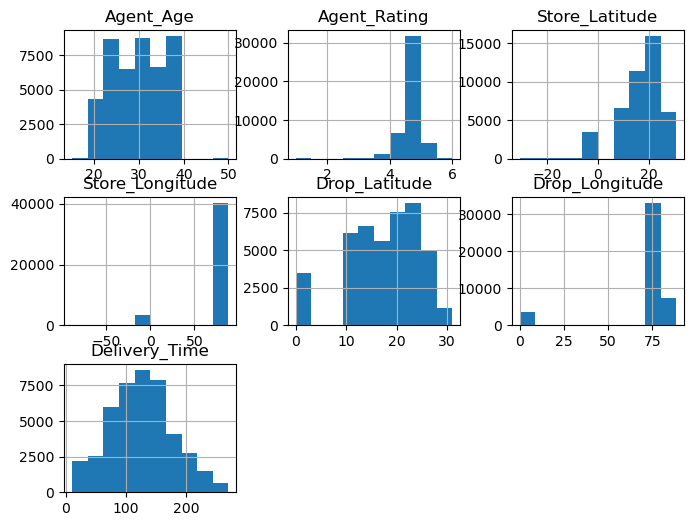

<Figure size 800x600 with 0 Axes>

In [28]:
# it's a over all review through the histogram plot 

plt.rcParams['figure.figsize'] = [8,6]
df_numeric = df.select_dtypes(include=np.number)
df_numeric.hist()
plt.show()
plt.tight_layout()

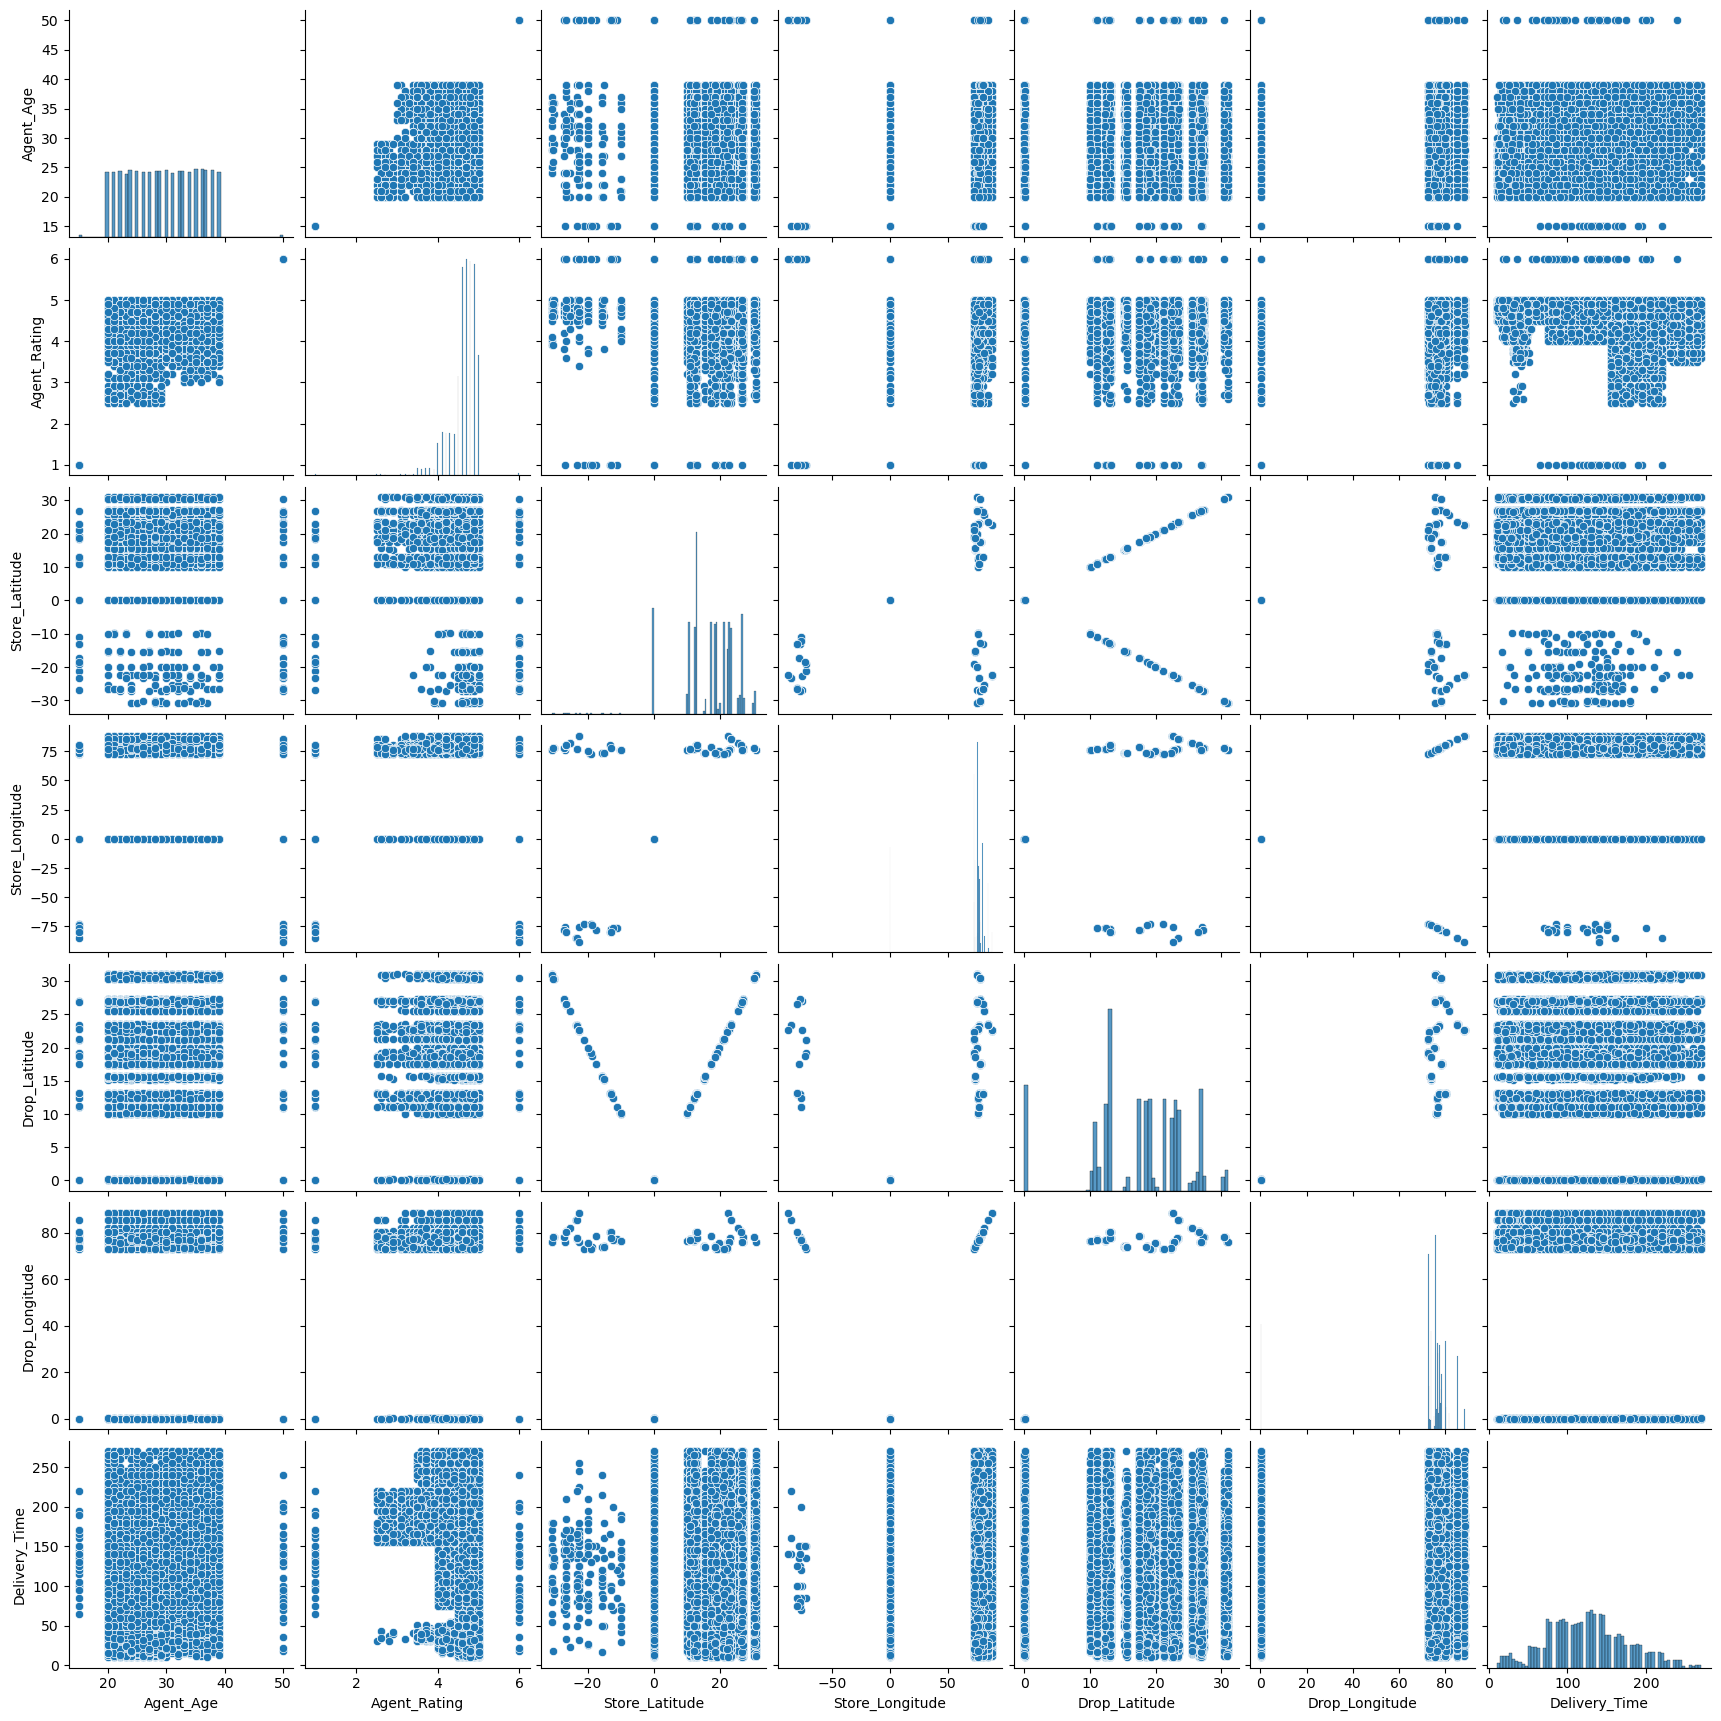

In [29]:
# I'm just trying to show this future 'pairplot' here we see many so we can't conlclude with this
# It will more effective when we have a fewer columns. in this case seems like clumsy 

sns.pairplot(df)
plt.show()

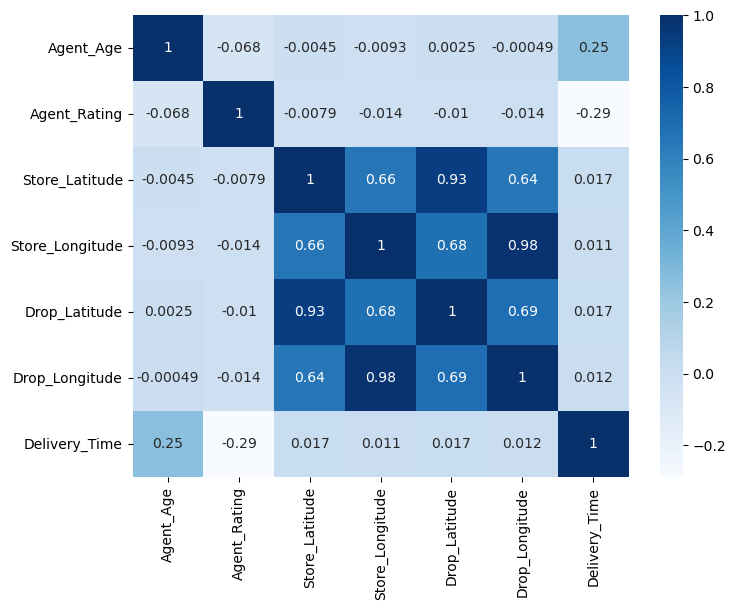

In [31]:
plt.figure(figsize=(8,6))


sns.heatmap(df_numeric.corr(),annot = True, cmap = 'Blues')

plt.show()

In [19]:
# Let's find the how many of the same data here

df.nunique()

Order_ID           43739
Agent_Age             22
Agent_Rating          28
Store_Latitude       521
Store_Longitude      415
Drop_Latitude       4367
Drop_Longitude      4367
Order_Date            44
Order_Time           177
Pickup_Time          193
Weather                6
Traffic                5
Vehicle                4
Area                   4
Delivery_Time         89
Category              16
dtype: int64

<Axes: ylabel='Density'>

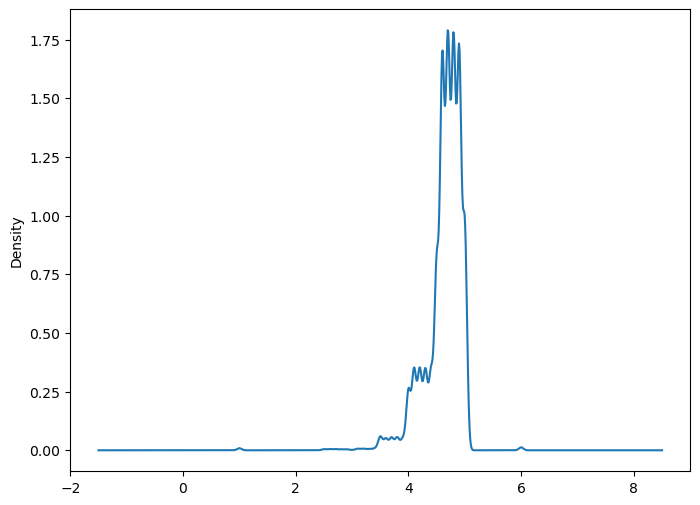

In [20]:
# So We Can Fetching the Plot (Single Kind Of Plot) via .plot() for any Feature Data


df['Agent_Rating'].plot(kind='kde')

<Axes: xlabel='Agent_Rating'>

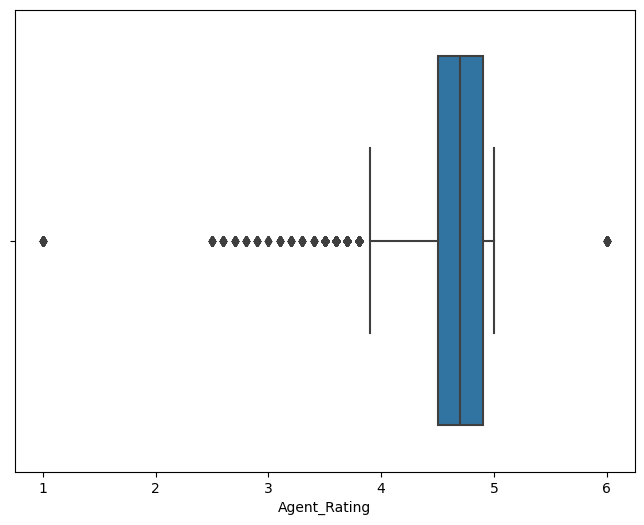

In [21]:
# Agent Rating visualize via boxplot
sns.boxplot(x=df['Agent_Rating'])

5.500000000000001
3.8999999999999995


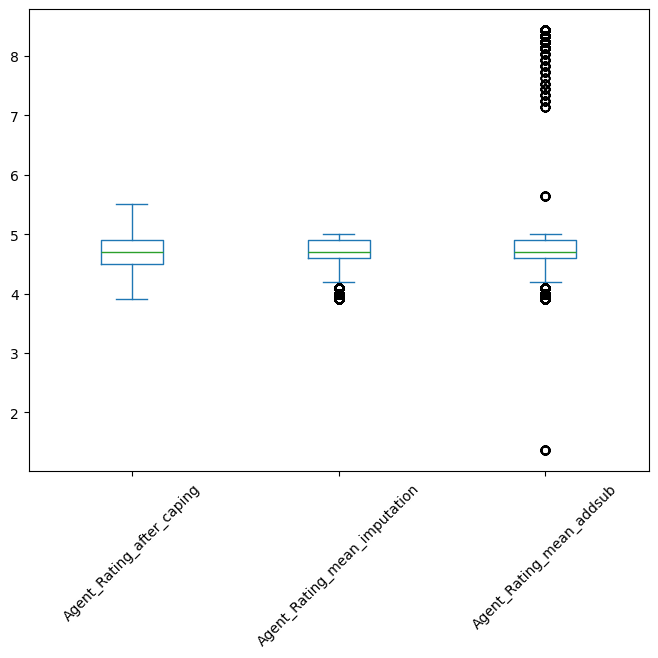

In [22]:
# Now we Find the Outliers via box plot 

# # outlier treatment

# 1) capping
# 2) Mean imputation
# 3) Mean addition and subtraction

q1 = df['Agent_Rating'].quantile(0.25)
q3 = df['Agent_Rating'].quantile(0.75)
iqr = q3 -q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df ['Agent_Rating_after_caping'] = df['Agent_Rating'].apply(lambda x: ll if x<ll else ul if x>ul else x)

df ['Agent_Rating_mean_imputation'] = df['Agent_Rating'].apply(lambda x: df['Agent_Rating'].mean() if x<ll else df['Agent_Rating'].mean() if x>ul else x)

df ['Agent_Rating_mean_addsub'] = df['Agent_Rating'].apply(lambda x: x+df['Agent_Rating'].mean() if x<ll else x-df['Agent_Rating'].mean() if x>ul else x)

df[['Agent_Rating_after_caping','Agent_Rating_mean_imputation','Agent_Rating_mean_addsub']].plot(kind='box')

plt.xticks(rotation=45)

print(ul)
print(ll)


<Axes: ylabel='Density'>

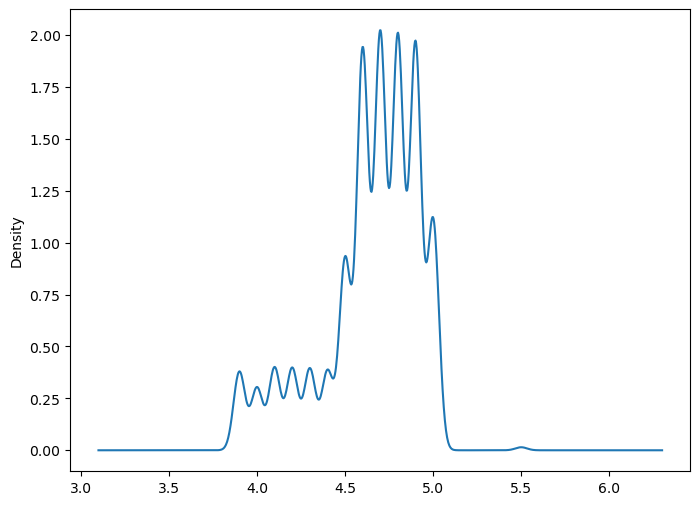

In [23]:
df['Agent_Rating_after_caping'].plot(kind='kde')
# so we consider capping to treat the outliers

<Axes: xlabel='Agent_Age'>

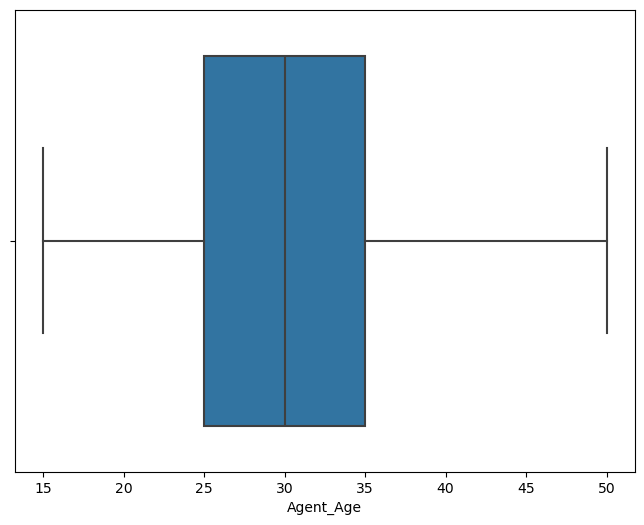

In [24]:
sns.boxplot(x=df['Agent_Age'])
# there are no outliers in agent_age

<Axes: xlabel='Weather', ylabel='count'>

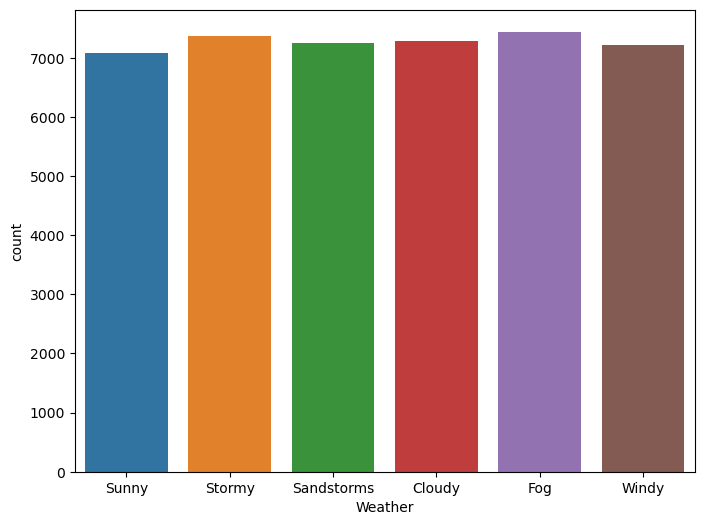

In [25]:
sns.countplot(x=df['Weather'])

In [26]:
print(df['Traffic'].value_counts())

df.head(2)
# So We can easly replace the NaN with Mode of the Traffic 

Traffic
Low        14999
Jam        13725
Medium     10628
High        4296
NaN           91
Name: count, dtype: int64


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Agent_Rating_after_caping,Agent_Rating_mean_imputation,Agent_Rating_mean_addsub
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,4.9,4.9,4.9
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5


In [27]:
df['Traffic'].value_counts()
a = df['Traffic'].mode()[0]
df['Traffic'].replace('NaN ',a,inplace = True) # It's work after give a space in next to the N ----> 'NaN '
print(df['Traffic'].value_counts())

Traffic
Low        15090
Jam        13725
Medium     10628
High        4296
Name: count, dtype: int64


<Axes: xlabel='Traffic', ylabel='count'>

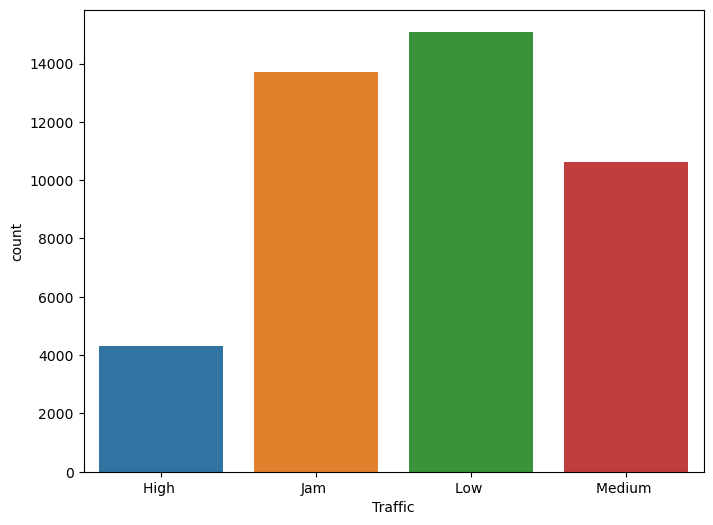

In [28]:
sns.countplot(x=df['Traffic'])

<Axes: xlabel='Vehicle', ylabel='count'>

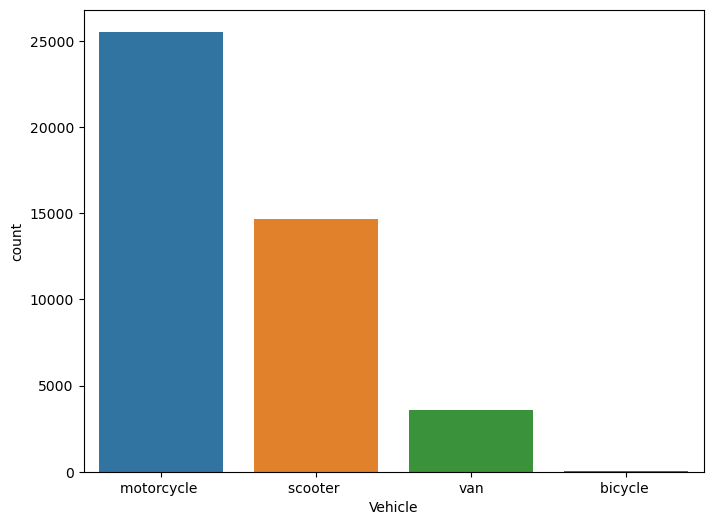

In [29]:
sns.countplot(x=df['Vehicle'])

<Axes: xlabel='Area', ylabel='count'>

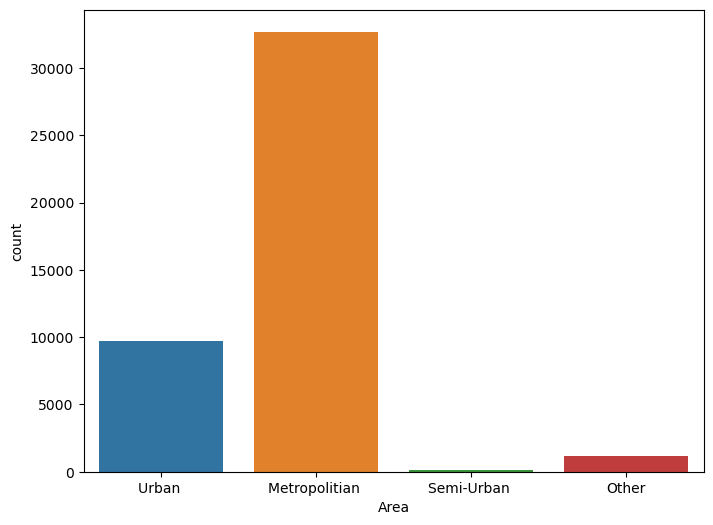

In [30]:
# We use count plot know which aera got most deliveried 
sns.countplot(x=df['Area'])

<Axes: xlabel='Delivery_Time'>

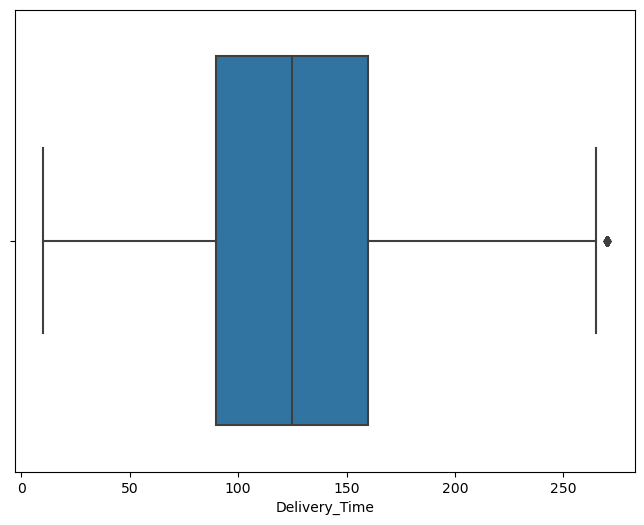

In [31]:
# We check is there any outlier in Delivery Time via box plot
sns.boxplot(x=df['Delivery_Time'])

<Axes: >

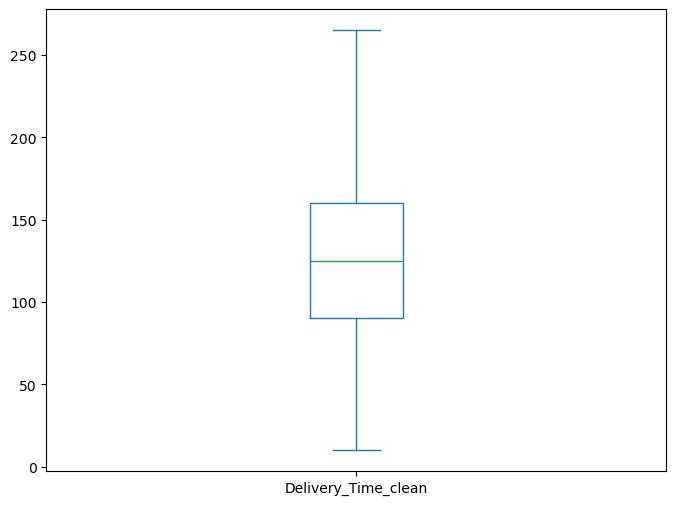

In [32]:
# cappping is work so apply the capping here also

q1  = df['Delivery_Time'].quantile(0.25)
q3  = df['Delivery_Time'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['Delivery_Time_clean'] = df['Delivery_Time'].apply(lambda x : ll if x<ll else ul if x>ul else x)
df['Delivery_Time_clean'].plot(kind='box')

<Axes: xlabel='count', ylabel='Category'>

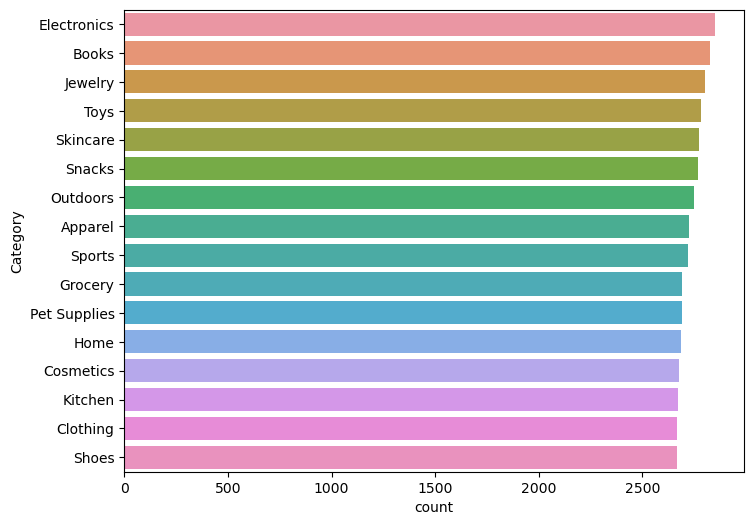

In [33]:
# Analysing the Categorical columns through countplot
sns.countplot(y=df['Category'],order=df['Category'].value_counts().index)

<Axes: xlabel='Agent_Age', ylabel='Agent_Rating'>

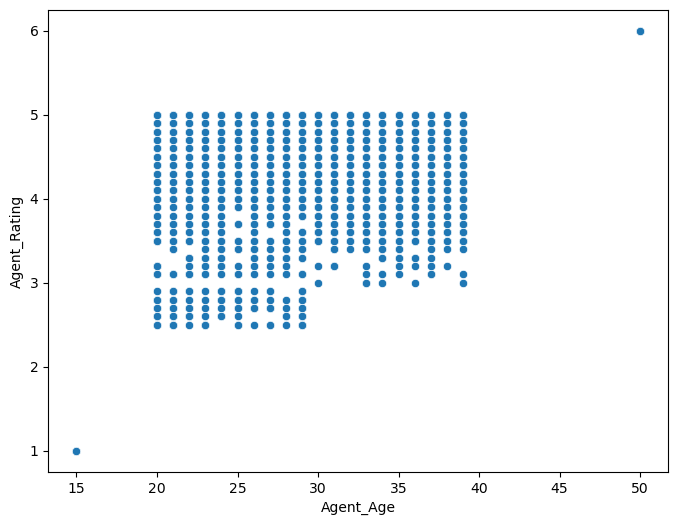

In [34]:
sns.scatterplot(x=df['Agent_Age'], y=df['Agent_Rating'])

# the highest rating given by the customer to the delivery agent who is 50 years old 
# so by looking at this data we can infer that the employee could be experienced
# Agent with 15 year old is identified which is against regulatory voilation

In [35]:
# for knowing the skew of below columns
df[['Agent_Rating','Agent_Rating_after_caping','Agent_Rating_mean_imputation','Agent_Rating_mean_addsub']].skew()

Agent_Rating                   -2.495635
Agent_Rating_after_caping      -0.984833
Agent_Rating_mean_imputation   -0.951017
Agent_Rating_mean_addsub        4.013221
dtype: float64

In [36]:
# for knowing the kurt of below columns
df[["Agent_Rating","Agent_Rating_after_caping","Agent_Rating_mean_imputation","Agent_Rating_mean_addsub"]].kurt()

Agent_Rating                    15.694417
Agent_Rating_after_caping        0.491194
Agent_Rating_mean_imputation     0.489381
Agent_Rating_mean_addsub        22.466079
dtype: float64

<Axes: xlabel='Agent_Age', ylabel='Delivery_Time_clean'>

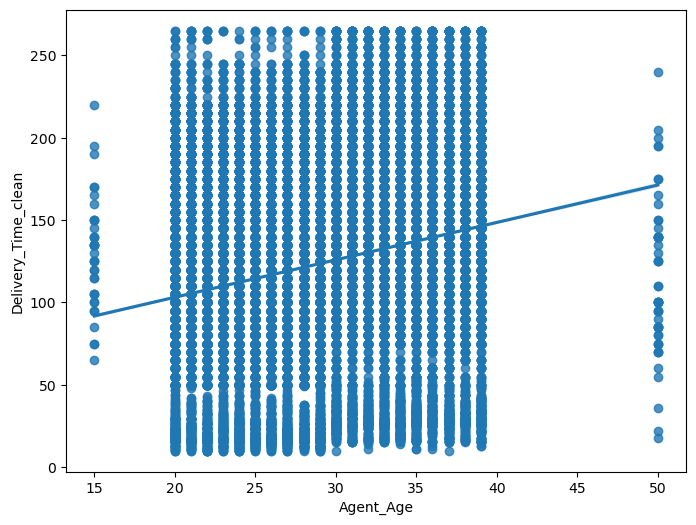

In [37]:
sns.regplot(x=df['Agent_Age'],y=df['Delivery_Time_clean'])


<Axes: xlabel='Agent_Rating_after_caping', ylabel='Delivery_Time_clean'>

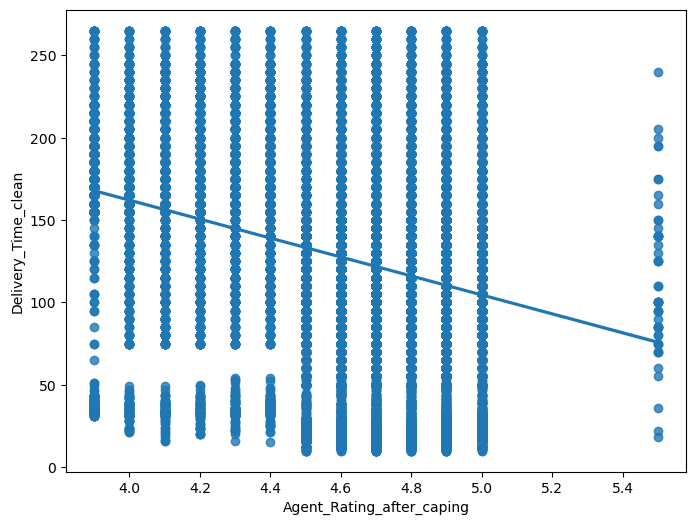

In [38]:
sns.regplot(x=df['Agent_Rating_after_caping'],y=df['Delivery_Time_clean'])

<Axes: xlabel='Weather', ylabel='Delivery_Time_clean'>

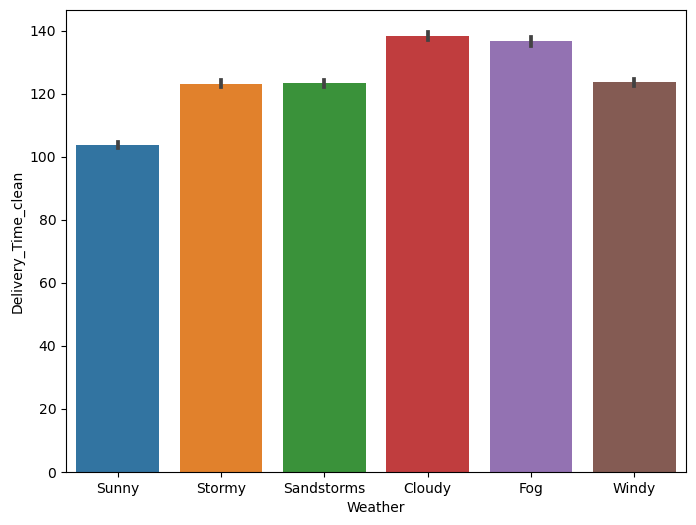

In [39]:
sns.barplot(x=df['Weather'],y=df['Delivery_Time_clean'])

# the longest duration of the delivery is on cloudy day and lowest delivery duration is on sunny day 

<Axes: xlabel='Vehicle', ylabel='Delivery_Time_clean'>

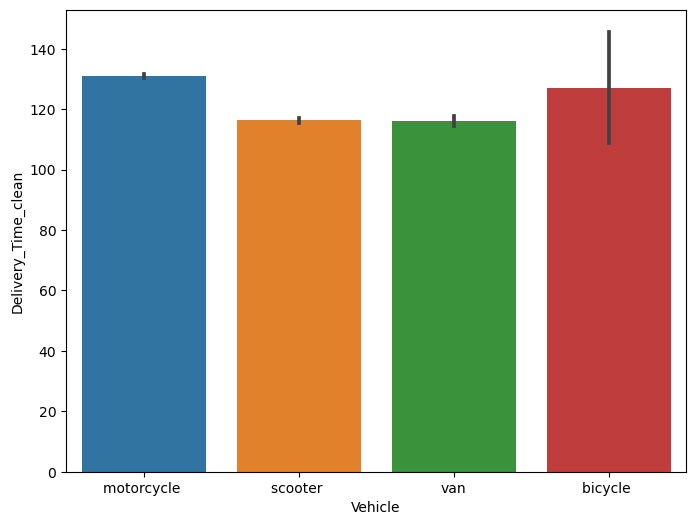

In [40]:
sns.barplot(x=df['Vehicle'],y=df['Delivery_Time_clean'])
# From the data motorcycle delivery duration is longer than all the other means of transport
# By this we can also infer that bycycle range of delivery radius may be less 

<Axes: xlabel='Area', ylabel='Delivery_Time_clean'>

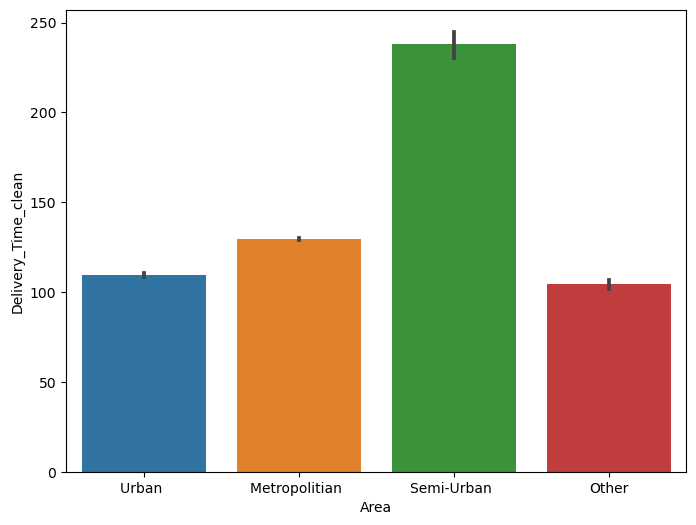

In [41]:
sns.barplot(x=df['Area'],y=df['Delivery_Time_clean'])
# From this we can infer that semi urban delivery time is so long compared to urban and metropolitan
# we can say that semi urban contains less number of drivers so it took longer duration

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Cosmetics'),
  Text(4, 0, 'Toys'),
  Text(5, 0, 'Snacks'),
  Text(6, 0, 'Shoes'),
  Text(7, 0, 'Apparel'),
  Text(8, 0, 'Jewelry'),
  Text(9, 0, 'Outdoors'),
  Text(10, 0, 'Grocery'),
  Text(11, 0, 'Books'),
  Text(12, 0, 'Kitchen'),
  Text(13, 0, 'Home'),
  Text(14, 0, 'Pet Supplies'),
  Text(15, 0, 'Skincare')])

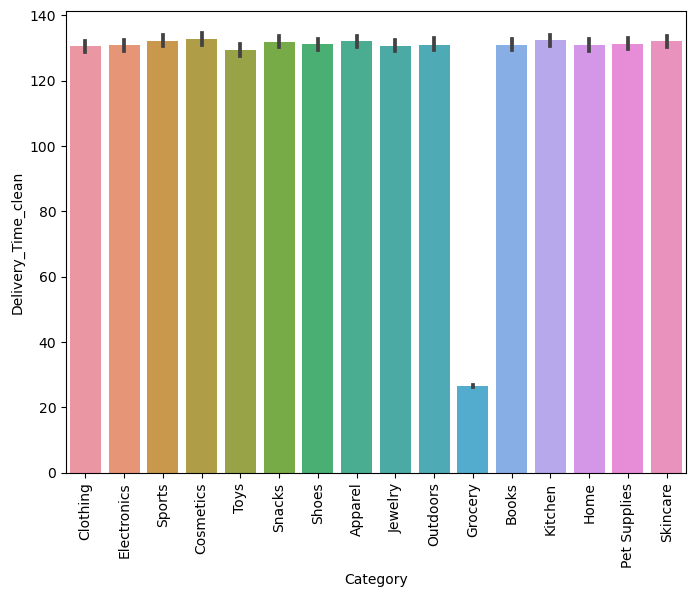

In [42]:
sns.barplot(x=df['Category'],y=df['Delivery_Time_clean'])
plt.xticks(rotation=90)
# grocery delivery is faster than all other categories 
# the transport of goods from other categories took some time for transportation from manufacturer

<Axes: xlabel='Weather', ylabel='count'>

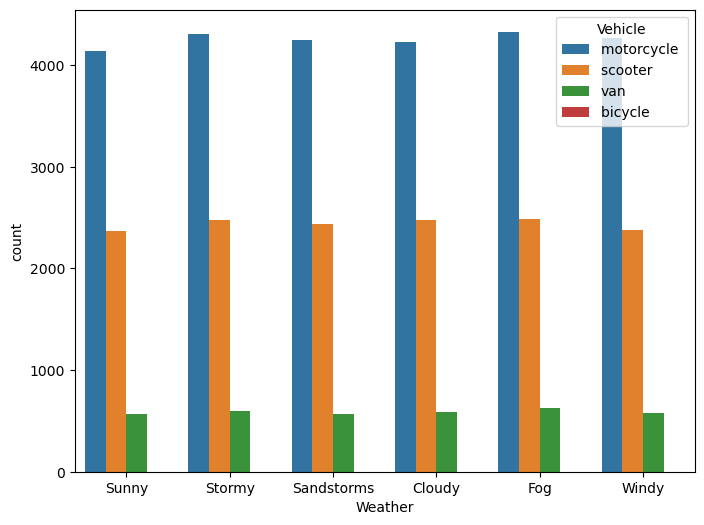

In [43]:
#The hue parameter allows you to add a second categorical variable to the plot,  
# which will be represented by different colors

sns.countplot(x=df['Weather'],hue=df['Vehicle'])

#We can infer that on the sunny day the deliveries on motorcycle are less compared to other weather conditions

In [44]:
# In this data set I have Order time and Delivery time so i'm just trying series 
df.head(2)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Agent_Rating_after_caping,Agent_Rating_mean_imputation,Agent_Rating_mean_addsub,Delivery_Time_clean
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,4.9,4.9,4.9,120.0
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,4.5,4.5,4.5,165.0


# Time Series

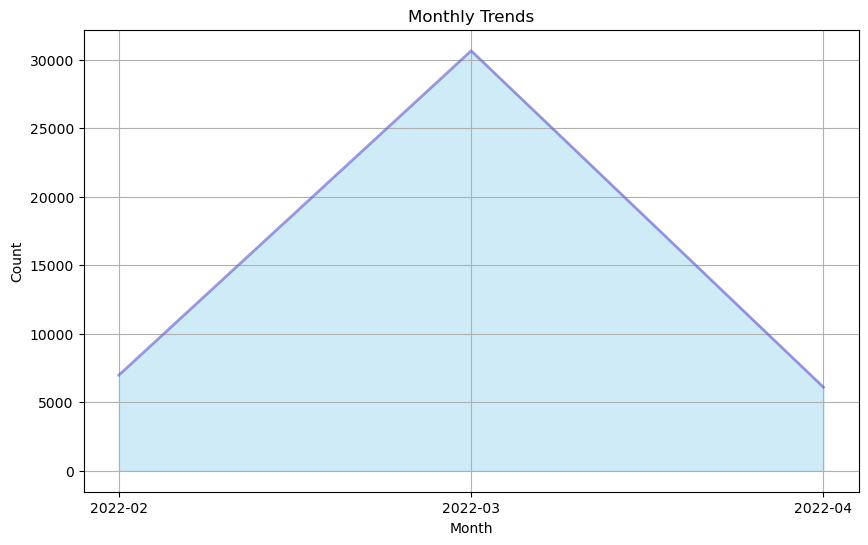

In [46]:

df ['New_Order_Date'] = pd.to_datetime(df['Order_Date'],utc=True ,format='mixed',dayfirst = False)
df ['Month'] = df['New_Order_Date'].dt.to_period ('M')
df ['Year'] = df['New_Order_Date'].dt.year

df_monthly = df.groupby('Month').count().reset_index()


plt.figure(figsize=(10, 6))
plt.fill_between(df_monthly['Month'].astype(str), df_monthly['New_Order_Date'], color='skyblue', alpha=0.4)
plt.plot(df_monthly['Month'].astype(str), df_monthly['New_Order_Date'], color='Slateblue', alpha=0.6, linewidth=2)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Trends')
plt.grid()
#plt.show()

# Creating a Model

In [48]:
# Before that change the categorical values to numeric values
# and also normlise the numeric  values

In [83]:
label = LabelEncoder()
stand_scaler = StandardScaler()


df['Vehicle']=label.fit_transform(df['Vehicle'])
df['Area']=label.fit_transform(df['Area'])
df['Weather']=label.fit_transform(df['Weather'])
df['Traffic']=label.fit_transform(df['Traffic'])
df['New_Agent_Age']=stand_scaler.fit_transform(df[['Agent_Age']])
df['New_Delivery_Time']=stand_scaler.fit_transform(df[['Delivery_Time']])
df['New_Delivery_Time_clean']=stand_scaler.fit_transform(df[['Delivery_Time_clean']])




In [89]:

x = df [['Vehicle','New_Delivery_Time_clean','Traffic','New_Agent_Age','Area','Weather']] # New_Delivery_Time

y = df ['Agent_Rating']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(x_train, y_train)
param_grid = {'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search.fit(x_train, y_train)
predict = model.predict(x_test)

R2 = r2_score(y_test,predict)
print(R2)

0.41084086302960465


# Final Model

In [87]:

x = df[['New_Delivery_Time_clean', 'New_Agent_Age', 'Vehicle', 'Traffic', 'Weather', 'Area']]
y = df['Agent_Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

best_estimator = grid_search.best_estimator_

best_estimator.fit(x_train, y_train)
prediction = best_estimator.predict(x_test)
print(prediction)


R2 = r2_score(y_test, prediction)
print(R2)


[4.74633716 4.72707427 4.48989842 ... 4.32292471 4.73617363 4.52673018]
0.5226060705355603


## I just try with best Param to get good accuracy

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

x = df[['New_Delivery_Time_clean', 'New_Agent_Age', 'Vehicle', 'Area', 'Traffic', 'Weather',]] # 
y = df['Agent_Rating']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

param_dist = {
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": ['auto', 'sqrt', 'log2'],
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, Y_train)

best_estimator = random_search.best_estimator_

best_estimator.fit(X_train, Y_train)
prediction = best_estimator.predict(X_test)
print(prediction)

R2 = r2_score(Y_test, prediction)
print(R2)

# it's also give a same result

[4.74616589 4.7318073  4.48586835 ... 4.32264486 4.73423529 4.54388123]
0.5212783941457324


## so I try with new model

In [85]:

x = df[['New_Delivery_Time_clean', 'New_Agent_Age', 'Vehicle', 'Area','Traffic', 'Weather',]] # 
y = df['Agent_Rating']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()

param_dist = {
    "n_estimators": randint(100, 1000),
    "learning_rate": uniform(0.01, 0.3),
    "max_depth": randint(3, 10),
    "min_child_weight": randint(1, 10),
    "subsample": uniform(0.5, 1.0),
    "colsample_bytree": uniform(0.5, 1.0)
}

random_search = RandomizedSearchCV(xgb_model, param_dist, n_iter=100, cv=5, scoring='r2', random_state=42)
random_search.fit(x_train, y_train)

best_estimator = random_search.best_estimator_

best_estimator.fit(x_train, y_train)
prediction = best_estimator.predict(x_test)
print(prediction)

R2 = r2_score(y_test, prediction)
print(R2)


[4.7318044 4.6657033 4.477932  ... 4.3658624 4.737084  4.5221663]
0.528712332668971
